In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/DR_Messidor_Dataset")))

['train', 'test']


In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
img_height = 256
img_width = 256
channels = 3
batch_size = 8
epochs = 20

train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/DR_Messidor_Dataset/train',
     target_size = (img_height, img_width),
     batch_size = batch_size,
     class_mode = 'binary',
     subset = 'training',
     shuffle=True)



test_set = test_datagen.flow_from_directory(
    '/content/drive/My Drive/DR_Messidor_Dataset/test',
     target_size = (img_height, img_width),
     batch_size = batch_size,
     shuffle = False,
     class_mode = 'binary')

print(training_set.class_indices)

Found 305 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
{'DR_Negative': 0, 'DR_Positive': 1}


In [ ]:
model = tf.keras.applications.InceptionV3(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, channels),classifier_activation="softmax")

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

print(model.summary())
print(top_model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)

# Save Model
history = top_model.fit(
          training_set,
          steps_per_epoch=training_set.n // batch_size,
          epochs=30,
          validation_data=test_set,
          validation_steps=test_set.n // batch_size)

# Save Model
top_model.save('covid_model.h5', save_format='h5')

NameError: ignored

In [ ]:
history = top_model.fit(
          training_set,
          steps_per_epoch=training_set.n // batch_size,
          epochs=90,
          validation_data=test_set,
          validation_steps=test_set.n // batch_size)

Epoch 1/90
38/38 [==============================] - 29s 753ms/step - loss: 0.6260 - accuracy: 0.6195 - precision: 0.5968 - recall: 0.5401 - auc: 0.6984 - val_loss: 0.7939 - val_accuracy: 0.5125 - val_precision: 1.0000 - val_recall: 0.1333 - val_auc: 0.6968
Epoch 2/90
38/38 [==============================] - 28s 740ms/step - loss: 0.6480 - accuracy: 0.5993 - precision: 0.5888 - recall: 0.4565 - auc: 0.6627 - val_loss: 0.6557 - val_accuracy: 0.5375 - val_precision: 0.7857 - val_recall: 0.2444 - val_auc: 0.7260
Epoch 3/90
38/38 [==============================] - 28s 742ms/step - loss: 0.6286 - accuracy: 0.6465 - precision: 0.6700 - recall: 0.4820 - auc: 0.6855 - val_loss: 0.6563 - val_accuracy: 0.5125 - val_precision: 0.7143 - val_recall: 0.2222 - val_auc: 0.7371
Epoch 4/90
38/38 [==============================] - 28s 741ms/step - loss: 0.5913 - accuracy: 0.6667 - precision: 0.6581 - recall: 0.5662 - auc: 0.7414 - val_loss: 0.7587 - val_accuracy: 0.5375 - val_precision: 1.0000 - val_recal

In [ ]:
history = top_model.fit(
          training_set,
          steps_per_epoch=training_set.n // batch_size,
          epochs=30,
          validation_data=test_set,
          validation_steps=test_set.n // batch_size)

Epoch 1/30
38/38 [==============================] - 28s 748ms/step - loss: 0.5787 - accuracy: 0.6667 - precision: 0.6939 - recall: 0.4964 - auc: 0.7479 - val_loss: 0.5746 - val_accuracy: 0.6375 - val_precision: 0.8636 - val_recall: 0.4222 - val_auc: 0.8213
Epoch 2/30
38/38 [==============================] - 28s 736ms/step - loss: 0.5962 - accuracy: 0.6566 - precision: 0.6667 - recall: 0.5000 - auc: 0.7145 - val_loss: 0.5783 - val_accuracy: 0.6125 - val_precision: 0.8500 - val_recall: 0.3778 - val_auc: 0.8054
Epoch 3/30
38/38 [==============================] - 28s 734ms/step - loss: 0.5931 - accuracy: 0.6599 - precision: 0.7241 - recall: 0.4500 - auc: 0.7556 - val_loss: 0.5790 - val_accuracy: 0.6500 - val_precision: 0.9474 - val_recall: 0.4000 - val_auc: 0.8206
Epoch 4/30
38/38 [==============================] - 28s 736ms/step - loss: 0.5570 - accuracy: 0.6768 - precision: 0.6750 - recall: 0.5870 - auc: 0.7613 - val_loss: 0.5547 - val_accuracy: 0.6500 - val_precision: 0.8400 - val_recal

In [ ]:
history = top_model.fit(
          training_set,
          steps_per_epoch=training_set.n // batch_size,
          epochs=30,
          validation_data=test_set,
          validation_steps=test_set.n // batch_size)

Epoch 1/30
38/38 [==============================] - 28s 741ms/step - loss: 0.5457 - accuracy: 0.7138 - precision: 0.7453 - recall: 0.5766 - auc: 0.7859 - val_loss: 0.5739 - val_accuracy: 0.6500 - val_precision: 0.9048 - val_recall: 0.4222 - val_auc: 0.8279
Epoch 2/30
38/38 [==============================] - 28s 733ms/step - loss: 0.5347 - accuracy: 0.7071 - precision: 0.7168 - recall: 0.5956 - auc: 0.7922 - val_loss: 0.6473 - val_accuracy: 0.5750 - val_precision: 1.0000 - val_recall: 0.2444 - val_auc: 0.8200
Epoch 3/30
38/38 [==============================] - 28s 739ms/step - loss: 0.5587 - accuracy: 0.7138 - precision: 0.7865 - recall: 0.5147 - auc: 0.8009 - val_loss: 0.5827 - val_accuracy: 0.6250 - val_precision: 1.0000 - val_recall: 0.3333 - val_auc: 0.8587
Epoch 4/30
38/38 [==============================] - 28s 739ms/step - loss: 0.5622 - accuracy: 0.6970 - precision: 0.7423 - recall: 0.5255 - auc: 0.7710 - val_loss: 0.5903 - val_accuracy: 0.6125 - val_precision: 1.0000 - val_recal

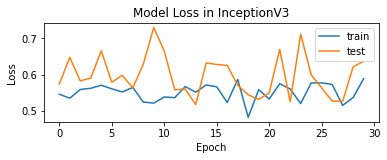

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Loss in InceptionV3')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
InceptionV3_train_loss = history.history['loss']
InceptionV3_test_loss = history.history['val_loss']
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/LossInceptionV3.png')
pyplot.legend()
pyplot.show()

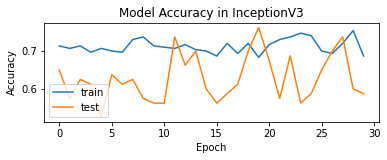

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Accuracy in InceptionV3')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
InceptionV3_train_accuracy = history.history['accuracy']
InceptionV3_test_accuracy= history.history['val_accuracy']
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AccuracyInceptionV3.png')
pyplot.legend()
pyplot.show()

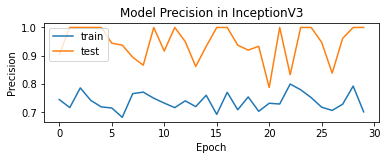

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Precision in InceptionV3')
pyplot.ylabel('Precision')
pyplot.xlabel('Epoch')
InceptionV3_train_precision = history.history['precision']
InceptionV3_test_precision = history.history['val_precision']
pyplot.plot(history.history['precision'], label='train')
pyplot.plot(history.history['val_precision'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/PrecisionInceptionV3.png')
pyplot.legend()
pyplot.show()

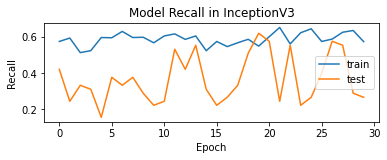

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Recall in InceptionV3')
pyplot.ylabel('Recall')
pyplot.xlabel('Epoch')
InceptionV3_train_recall = history.history['recall']
InceptionV3_test_recall = history.history['val_recall']
pyplot.plot(history.history['recall'], label='train')
pyplot.plot(history.history['val_recall'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/RecallInceptionV3.png')
pyplot.legend()
pyplot.show()

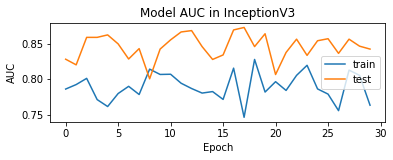

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model AUC in InceptionV3')
pyplot.ylabel('AUC')
pyplot.xlabel('Epoch')
InceptionV3_train_auc = history.history['auc']
InceptionV3_test_auc = history.history['val_auc']
pyplot.plot(history.history['auc'], label='train')
pyplot.plot(history.history['val_auc'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AucInceptionV3.png')
pyplot.legend()
pyplot.show()

In [ ]:
top_model.compile(optimizer='sgd',
              loss='mse',
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history = top_model.fit(training_set, validation_data = test_set, epochs=1, batch_size=32, verbose=2)

39/39 - 33s - loss: 0.1970 - true_positives: 75.0000 - true_negatives: 133.0000 - false_positives: 31.0000 - false_negatives: 66.0000 - val_loss: 0.2551 - val_true_positives: 8.0000 - val_true_negatives: 35.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 38.0000


In [ ]:
top_model.compile(optimizer='sgd',
              loss='mse',
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history = top_model.fit(training_set, validation_data = test_set, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
39/39 - 33s - loss: 0.1753 - true_positives: 78.0000 - true_negatives: 145.0000 - false_positives: 19.0000 - false_negatives: 63.0000 - val_loss: 0.1820 - val_true_positives: 24.0000 - val_true_negatives: 34.0000 - val_false_positives: 1.0000 - val_false_negatives: 22.0000
Epoch 2/10
39/39 - 28s - loss: 0.1976 - true_positives: 82.0000 - true_negatives: 136.0000 - false_positives: 28.0000 - false_negatives: 59.0000 - val_loss: 0.2631 - val_true_positives: 9.0000 - val_true_negatives: 35.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 37.0000
Epoch 3/10
39/39 - 28s - loss: 0.1994 - true_positives: 80.0000 - true_negatives: 134.0000 - false_positives: 30.0000 - false_negatives: 61.0000 - val_loss: 0.2395 - val_true_positives: 12.0000 - val_true_negatives: 35.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 34.0000
Epoch 4/10
39/39 - 28s - loss: 0.1789 - true_positives: 89.0000 - true_negatives: 139.0000 - false_positives: 25.0000 - false_negatives: 5

In [ ]:
### Performance evaluation of Confusion Matrix
#########################
score = top_model.evaluate(test_set)

11/11 [==============================] - 4s 403ms/step - loss: 0.2188 - true_positives: 12.0000 - true_negatives: 35.0000 - false_positives: 0.0000e+00 - false_negatives: 34.0000


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[96,2],
         [5,96]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/ConfusionMatrix_InceptionV3.png')
pyplot.show()